data# Homework 3 : Feature Selection
## Author: Calvin Henggeler

### Intructions:
Start from our class notebook on 9/25. Do the following:

1) Run feature selection by elimination on the principle components the same way we did on the original feature set. Compute the accuracies on the validation set using the most predictive n features, as n = 1, ..., 6. Plot these accuracies vs the accuracies we got by doing elimination on the original feature set. Is the set of n most predictive principal components more predictive than the set of n most predictive original features?
2) Do feature elimination on the original set of six features using a selection of regression models. Do you get the same order of feature importance regardless of the model?

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [96]:
df = pd.read_csv('../data/housing.csv')

In [97]:
# df.head(3)

In [98]:
# df.columns

In [99]:
# switching latitiude and longitude order in the DataFrame
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']]

In [100]:
# df.describe()

## Data Preparation

In [146]:
# let's model median_house_value as our target variable
# I'll pick these six features
# I don't think lat and long will be useful for a linear model,
# and I will omit the string column ocean_proximity
features = ['housing_median_age', 'total_rooms','total_bedrooms',
            'population', 'households', 'median_income']
target = ['median_house_value']

In [147]:
# drop columns we won't use
df = df[features+target]

In [148]:
# drop rows with missing data in one of the remaining columns
df = df.dropna()

In [149]:
# let's do a train-val-test split
x_train,x_temp,y_train,y_temp = train_test_split(df[features],
                                                 df[target],
                                                 test_size = 0.4,
                                                 random_state = 0)

In [150]:
x_val,x_test,y_val,y_test = train_test_split(x_temp,
                                             y_temp,
                                             test_size = 0.5,
                                             random_state = 0)

## Model with Normal Features

In [151]:
lr = LinearRegression()

In [152]:
lr.fit(x_train,y_train)
lr.score(x_val,y_val)

0.5614677159523239

In [153]:
# let's look at the coefficients
for _ in zip(features,lr.coef_[0]):
    print(_[0],_[1])

housing_median_age 1866.0512948368798
total_rooms -18.604421509886397
total_bedrooms 98.4028763220934
population -32.80233615787491
households 113.494210279822
median_income 47133.06363115725


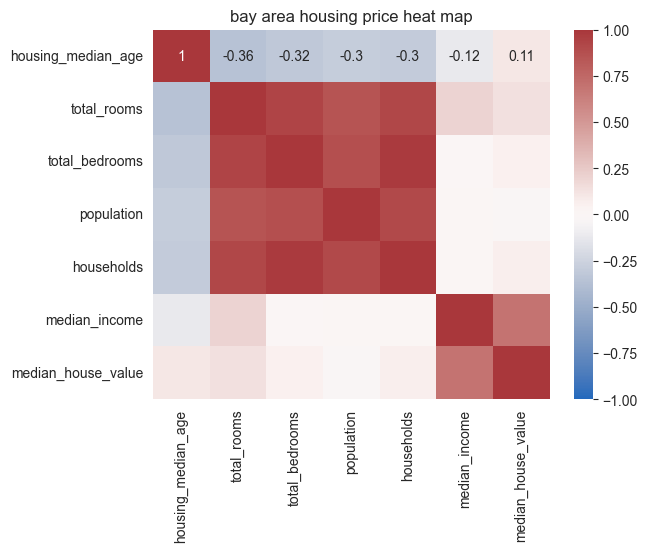

In [154]:
# Create Heatmap to see relationships between the original variables
fig,ax = plt.subplots()
ax = sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap="vlag",annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.set_title('bay area housing price heat map');

## Feature Selection on the Original Features

Score for all the possible combinations of Original Features at all lengths

In [155]:
coef_dct = dict(zip(features,[[],[],[],[],[],[]]))

In [156]:
# iterate amount of features being used
for i in range(1,len(features)+1):
    # iterate all feature combinations at length i
    for feature_subset in combinations(features,i):
        feature_subset = list(feature_subset)
        df_tmp = df[feature_subset+target]
        df_tmp = df_tmp.dropna()
        x_tr,x_tmp,y_tr,y_tmp = train_test_split(df_tmp[feature_subset],
                                                 df_tmp[target],
                                                 test_size = 0.4,
                                                 random_state = 0)
        x_vl,x_tst,y_vl,y_tst = train_test_split(x_tmp,
                                                 y_tmp,
                                                 test_size = 0.5,
                                                 random_state = 0)
        lr = LinearRegression()
        lr.fit(x_tr,y_tr)
        lr.score(x_vl,y_vl)
        for item in zip(feature_subset, lr.coef_[0]):
            coef_dct[item[0]].append(item[1])

In [157]:
df_coef = pd.DataFrame(coef_dct)
df_coef

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,991.235206,7.402545,14.805735,-2.230050,20.853429,41553.989830
1,1660.012290,10.903166,27.088042,1.148743,33.806899,42848.460094
2,1276.584852,33.760277,-146.526879,-53.007461,-110.477360,41565.855244
3,1021.097023,30.916364,83.353821,-29.356310,127.964939,41574.680047
4,1296.504403,25.254160,-99.222572,-45.564215,141.847800,41566.251823
5,1725.107860,-0.051918,15.931330,-2.765521,17.655702,41500.121584
6,1747.334250,38.466527,-152.205477,-53.995334,-121.367391,42113.434426
7,1735.296608,35.013960,93.078389,-28.443199,115.188106,43186.964277
8,1782.900935,30.773606,-75.995337,-43.933300,149.497341,42897.380984
9,1956.364322,3.975445,36.308307,3.204063,38.252060,42992.790507


<Axes: >

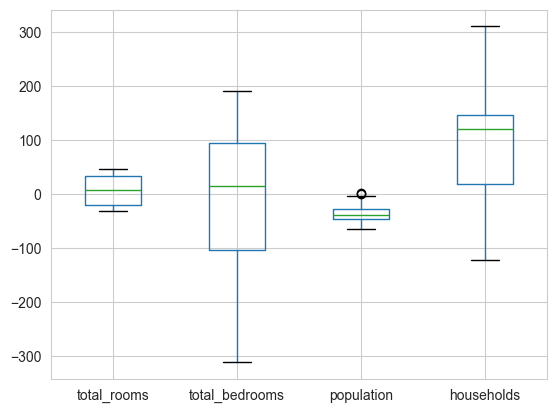

In [158]:
df_coef[features[1:-1]].boxplot()

In [114]:
# the wild fluctuation in coefficients per feature proves the features are dependent.
# the boxplot shows the impact of feature dependence on our ability to interpret a linear
# model.
# we will do feature engineering to produce a set of six independent features from the
# given feature set.
# specifically, we'll use Principal Component Analysis (PCA)
# PCA assumed the variables are jointly normally distributed.

# Feature Selection with PCA features

In [159]:
pca = PCA(n_components=6) # controls how many principal components are returned
# this gives us an object we can fit to some data
pca.fit(x_train)

PCA(n_components=6)

In [160]:
# Let's normalize the data first
scaler = StandardScaler()
# I fit the scaler to my training data
scaler.fit(x_train)

StandardScaler()

In [161]:
# View the normalized x_train Data
x_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9490,17.0,3145.0,693.0,1560.0,647.0,2.2926
3191,24.0,544.0,112.0,442.0,106.0,3.1071
9896,10.0,969.0,160.0,482.0,180.0,6.5799
8042,36.0,1348.0,234.0,643.0,221.0,3.6447
10421,31.0,3959.0,856.0,1919.0,775.0,4.0313


In [163]:
x_train_sc = scaler.transform(x_train)
x_train_sc

array([[-0.92681305,  0.23828173,  0.37225209,  0.12223333,  0.38867386,
        -0.82440528],
       [-0.37089754, -0.97288421, -1.02219532, -0.87950219, -1.04046774,
        -0.39625423],
       [-1.48272856, -0.77498128, -0.90699141, -0.84366193, -0.84498442,
         1.42926197],
       ...,
       [-0.45031404,  0.09625727, -0.11256439,  0.1455295 , -0.08946779,
         0.09082343],
       [-1.56214506, -0.98173164, -0.88059051, -0.14925671, -0.88460942,
        -0.2554296 ],
       [-0.37089754, -0.63668205, -0.63098202, -0.30516188, -0.53326777,
        -1.25008572]])

In [164]:
# fits the PCA to the scaled data
pca = PCA()
pca.fit(x_train_sc)

PCA()

In [165]:
# exercise: see how the coefficients of the PCs vary in linear models
# trained on all subsets of PCs.
pca_features = ['pc'+str(i) for i in range(1,7)]
df_pca = pd.DataFrame(pca.transform(x_train_sc),columns = pca_features)
coef_dct = dict(zip(pca_features,[[],[],[],[],[],[]]))

In [166]:
# Iterate through the combinations of PCA components (unranked)
for i in range(1,len(pca_features)+1):
    for feature_subset in combinations(pca_features,i):
        feature_subset = list(feature_subset)
        df_tmp = df_pca[feature_subset]
        df_tmp = df_tmp.dropna()
        lr = LinearRegression()
        lr.fit(df_tmp,y_train)
        lr.score(pd.DataFrame(pca.transform(scaler.transform(x_val)),columns=pca_features)[feature_subset],
                 y_val)
        for item in zip(feature_subset, lr.coef_[0]):
            coef_dct[item[0]].append(item[1])

In [126]:
pd.DataFrame(coef_dct)

,pc1,pc2,pc3,pc4,pc5,pc6
0,3729.771042,61453.696335,57019.918528,-38656.149322,-80516.639807,6014.28991
1,3729.771042,61453.696335,57019.918528,-38656.149322,-80516.639807,6014.28991
2,3729.771042,61453.696335,57019.918528,-38656.149322,-80516.639807,6014.28991
3,3729.771042,61453.696335,57019.918528,-38656.149322,-80516.639807,6014.28991
4,3729.771042,61453.696335,57019.918528,-38656.149322,-80516.639807,6014.28991
5,3729.771042,61453.696335,57019.918528,-38656.149322,-80516.639807,6014.28991
6,3729.771042,61453.696335,57019.918528,-38656.149322,-80516.639807,6014.28991
7,3729.771042,61453.696335,57019.918528,-38656.149322,-80516.639807,6014.28991
8,3729.771042,61453.696335,57019.918528,-38656.149322,-80516.639807,6014.28991
9,3729.771042,61453.696335,57019.918528,-38656.149322,-80516.639807,6014.28991


## Feature Elimination for Original Features
sorting the components by importance

In [167]:
# list comp which creates a deep copy
fs = [feat for feat in features]
important_features = []

# train linear models on each subset of 5 from fs, and remove from fs the least important.
while len(fs)>0:

    # if the last component, insert into list
    if len(fs)==1:
        important_features.insert(0,fs[0])
        break

    # list to store the held feature and score tuples
    res = []

    # iterate combinations, holding 1 feature out
    for comb in combinations(fs,len(fs)-1):
        # get the missing feature
        missing = [_ for _ in fs if _ not in list(comb)][0]
        # train and score model on all other features
        comb = list(comb)
        lr.fit(x_train[comb],y_train)
        score = lr.score(x_val[comb],y_val)
        res.append((missing,score))
    # max of the training scores singles out the held feature as the least important
    least_important = max(res,key = lambda t:t[1])[0]
    important_features.insert(0,least_important)
    fs.remove(least_important)

In [168]:
# now, check accuracy of our model with the first of these, the first two, ...
# and graph
feat_acc = []
for i in range(1,len(important_features)+1):
    lr.fit(x_train[important_features[:i]],y_train)
    feat_acc.append(lr.score(x_val[important_features[:i]],y_val))

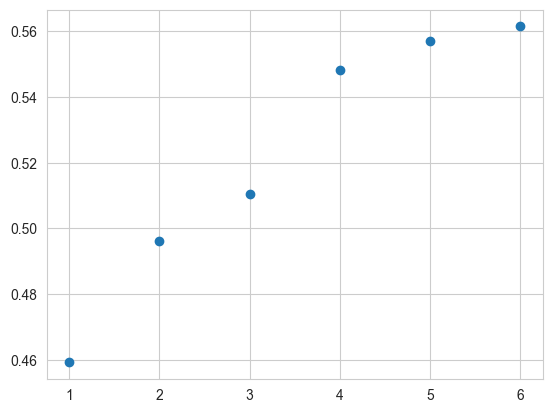

In [169]:
fig,ax = plt.subplots()
ax.scatter(range(1,len(important_features)+1),feat_acc);

In [170]:
# this trains a model on the first i PCs (i=1,...,6) and gets the accuracy
acc_pc = []
for i in range(1,7):
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_sc = scaler.transform(x_train)
    pca = PCA(n_components = i)
    pca.fit(x_train_sc)
    lr.fit(pca.transform(x_train_sc),y_train)
    sc = lr.score(pca.transform(scaler.transform(x_val)),y_val)
    acc_pc.append(sc)

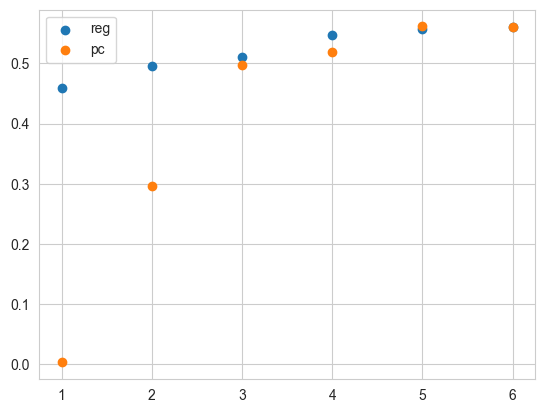

In [171]:
fig,ax = plt.subplots()
ax.scatter(range(1,len(important_features)+1),feat_acc,label = 'reg')
ax.scatter(range(1,len(important_features)+1),acc_pc,label = 'pc')
ax.legend();

## 1) Run feature selection by elimination on the principle components the same way we did on the original feature set. Compute the accuracies on the validation set using the most predictive n features, as n = 1, ..., 6. Plot these accuracies vs the accuracies we got by doing elimination on the original feature set. Is the set of n most predictive principal components more predictive than the set of n most predictive original features?

In [172]:
pca_val_df = pd.DataFrame(pca.transform(scaler.transform(x_val)), columns=pca_features)

In [140]:
# list comp which creates a deep copy
comps = [comp for comp in pca_features]
important_components = []

In [141]:

# train linear models on each subset, and remove from fs the least important.
while len(comps)>0:

    # if the last component, insert into list
    if len(comps)==1:
        important_components.insert(0,comps[0])
        break

    # list to store the held feature and score tuples
    res = []

    # iterate combinations, holding 1 PC out
    for comb in combinations(comps,len(comps)-1):
        # get the missing feature
        missing = [_ for _ in comps if _ not in list(comb)][0]
        # train and score model on all other features
        comb = list(comb)
        lr.fit(df_pca[comb],y_train)
        score = lr.score(pca_val_df[comb],y_val)
        res.append((missing,score))
    # max of the training scores singles out the held feature as the least important
    least_important = max(res,key = lambda t:t[1])[0]
    important_components.insert(0,least_important)
    comps.remove(least_important)

In [142]:
important_components

['pc2', 'pc3', 'pc5', 'pc4', 'pc1', 'pc6']

## Compare n most predictive features vs n most predictive components
Check model accuracy using the first i most predictive PC's

In [173]:
pc_acc = []
for i in range(1,len(important_components)+1):
    lr.fit(df_pca[important_components[:i]],y_train)
    pc_acc.append(lr.score(pca_val_df[important_components[:i]],y_val))

Plot i most predictive features vs i most predictive components

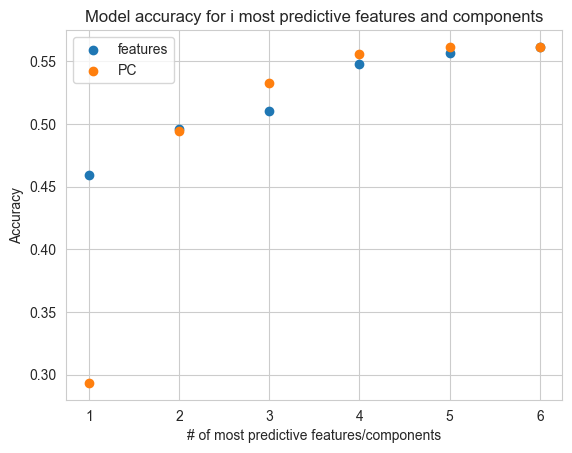

In [174]:
fig,ax = plt.subplots()
ax.scatter(range(1,len(important_features)+1),feat_acc,label = 'features')
ax.scatter(range(1,len(important_components)+1),pc_acc,label = 'PC')
ax.set_ylabel('Accuracy')
ax.set_xlabel('# of most predictive features/components')
ax.set_title('Model accuracy for i most predictive features and components')
ax.legend();

### Is the set of n most predictive principal components more predictive than the set of n most predictive original features?
The graph above shows the accuracy of models using the n most predictive features/principal components. It seems that using n most pricipal components trends higher than using the n most predictice original features, except for when n is low.

## Do feature elimination on the original set of six features using a selection of regression models. Do you get the same order of feature importance regardless of the model?

In [188]:
#
# Selection of regression models
#

# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, Lasso, Ridge

In [196]:
lr = LinearRegression()
log = LogisticRegression()
lasso = Lasso(alpha=0.1)
rdg = Ridge(alpha=0.1)

models = [lr, lasso, rdg]

In [197]:
for model in models:
    # list comp which creates a deep copy
    important_features = []
    fs = [feat for feat in features]

    # train linear models on each subset from fs, and remove from fs the least important.
    while len(fs)>0:

        # list to store the held feature and score tuples
        res = []

        # if the last component, insert into list
        if len(fs)==1:
            important_features.insert(0,fs[0])
            break

        # iterate combinations, holding 1 feature out
        for comb in combinations(fs,len(fs)-1):
            # get the missing feature
            missing = [_ for _ in fs if _ not in list(comb)][0]
            # train and score model on all other features
            comb = list(comb)
            model.fit(x_train[comb],y_train)
            score = model.score(x_val[comb], y_val)
            res.append((missing,score))

        # max of the training scores singles out the held feature as the least important
        least_important = max(res,key = lambda t:t[1])[0]
        important_features.insert(0,least_important)
        fs.remove(least_important)

    print(model, important_features)

LinearRegression() ['median_income', 'housing_median_age', 'households', 'population', 'total_rooms', 'total_bedrooms']
Lasso(alpha=0.1) ['median_income', 'housing_median_age', 'households', 'population', 'total_rooms', 'total_bedrooms']
Ridge(alpha=0.1) ['median_income', 'housing_median_age', 'households', 'population', 'total_rooms', 'total_bedrooms']


From these models I get the same order of feature importance.